In [1]:
# Install libraries
!pip install -q nltk scikit-learn matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv', encoding='latin-1')
df.head()
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
#  Preprocessing text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Lowercase
    text = text.split()  # Tokenize
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # Stemming + stopword removal
    return ' '.join(text)

df['clean_review'] = df['Review'].apply(clean_text)
df.head()

,Review,Rating,clean_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


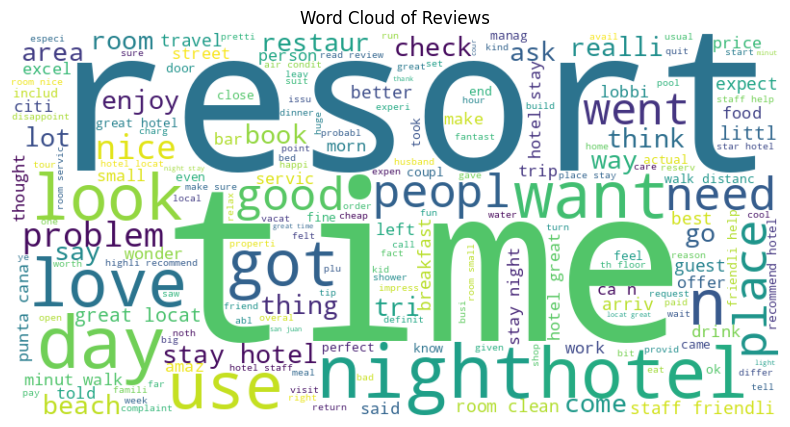

In [5]:
# Word Cloud
all_words = ' '.join(df['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [7]:
# Create sentiment column
df['sentiment'] = df['Rating'].apply(lambda rating: 1 if rating >= 4 else 0)

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.768236155159795

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18      1057
           1       0.76      1.00      0.86      3042

    accuracy                           0.77      4099
   macro avg       0.88      0.55      0.52      4099
weighted avg       0.82      0.77      0.69      4099



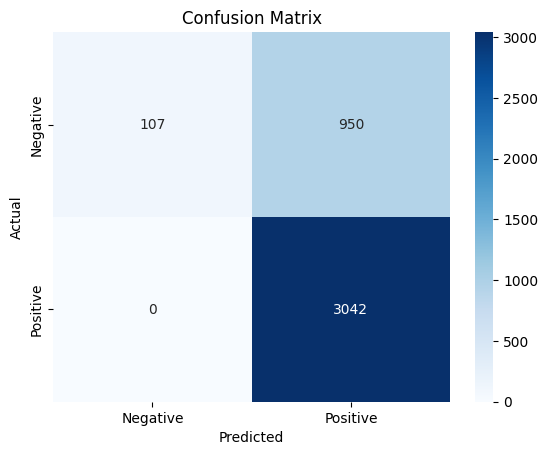

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
